In [1]:
import requests
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '47fa14d88e0a456492c750926efd2af1' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [4]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    lost_match = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName'] and (f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']):
            lost_match += 1   
        if team['name'] == f['awayTeamName'] and (f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']):
            lost_match += 1
            
    print('Team "{}", {} lost_match'.format(team['name'], lost_match))
    team['lost_match'] = lost_match

Team "FC Rio Ave", 13 lost_match
Team "FC Porto", 5 lost_match
Team "Moreirense FC", 18 lost_match
Team "FC Paços de Ferreira", 18 lost_match
Team "Sporting CP", 7 lost_match
Team "Maritimo Funchal", 13 lost_match
Team "CD Tondela", 16 lost_match
Team "SL Benfica", 9 lost_match
Team "Boavista Porto FC", 15 lost_match
Team "FC Arouca", 0 lost_match
Team "Vitoria Setubal", 16 lost_match
Team "C.F. Os Belenenses", 15 lost_match
Team "Vitoria Guimaraes", 17 lost_match
Team "Sporting Braga", 7 lost_match
Team "GD Estoril Praia", 20 lost_match
Team "Feirense", 21 lost_match
Team "Nacional Funchal", 0 lost_match
Team "G.D. Chaves", 13 lost_match


In [5]:
team_for_pd = []
for team in teams:
    if team['name']:
        team_for_pd.append({'name': team['name'], 'lost_match': team['lost_match']})
team_for_pd

[{'lost_match': 13, 'name': 'FC Rio Ave'},
 {'lost_match': 5, 'name': 'FC Porto'},
 {'lost_match': 18, 'name': 'Moreirense FC'},
 {'lost_match': 18, 'name': 'FC Paços de Ferreira'},
 {'lost_match': 7, 'name': 'Sporting CP'},
 {'lost_match': 13, 'name': 'Maritimo Funchal'},
 {'lost_match': 16, 'name': 'CD Tondela'},
 {'lost_match': 9, 'name': 'SL Benfica'},
 {'lost_match': 15, 'name': 'Boavista Porto FC'},
 {'lost_match': 0, 'name': 'FC Arouca'},
 {'lost_match': 16, 'name': 'Vitoria Setubal'},
 {'lost_match': 15, 'name': 'C.F. Os Belenenses'},
 {'lost_match': 17, 'name': 'Vitoria Guimaraes'},
 {'lost_match': 7, 'name': 'Sporting Braga'},
 {'lost_match': 20, 'name': 'GD Estoril Praia'},
 {'lost_match': 21, 'name': 'Feirense'},
 {'lost_match': 0, 'name': 'Nacional Funchal'},
 {'lost_match': 13, 'name': 'G.D. Chaves'}]

In [6]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,lost_match,name
0,13,FC Rio Ave
1,5,FC Porto
2,18,Moreirense FC
3,18,FC Paços de Ferreira
4,7,Sporting CP
5,13,Maritimo Funchal
6,16,CD Tondela
7,9,SL Benfica
8,15,Boavista Porto FC
9,0,FC Arouca


In [7]:
market_value = [{'name':'FC Rio Ave', 'market_value':22150000},
{'name':'FC Porto', 'market_value': 223100000},
{'name':'Moreirense FC', 'market_value': 14950000},
{'name':'FC Paços de Ferreira', 'market_value': 15900000},
{'name':'Sporting CP', 'market_value': 202500000},
{'name':'Maritimo Funchal', 'market_value': 21200000},
{'name':'CD Tondela', 'market_value': 13850000},
{'name':'SL Benfica', 'market_value': 178400000},
{'name':'Boavista Porto FC', 'market_value':16250000},
{'name':'FC Arouca', 'market_value': 22880000},
{'name':'Vitoria Setubal', 'market_value': 18100000},
{'name':'C.F. Os Belenenses', 'market_value': 1700000},
{'name':'Vitoria Guimaraes', 'market_value': 34700000},
{'name':'Sporting Braga', 'market_value': 63700000},
{'name':'GD Estoril Praia', 'market_value': 19250000},
{'name':'Feirense', 'market_value': 14950000},
{'name':'Nacional Funchal', 'market_value': 7800000},
{'name':'G.D. Chaves', 'market_value': 19500000}]

In [8]:
market_value_pd = pd.DataFrame(market_value)
market_value_pd

,market_value,name
0,22150000,FC Rio Ave
1,223100000,FC Porto
2,14950000,Moreirense FC
3,15900000,FC Paços de Ferreira
4,202500000,Sporting CP
5,21200000,Maritimo Funchal
6,13850000,CD Tondela
7,178400000,SL Benfica
8,16250000,Boavista Porto FC
9,22880000,FC Arouca


In [9]:
df = pd.merge(teams_pd, market_value_pd, on=['name'])
df

,lost_match,name,market_value
0,13,FC Rio Ave,22150000
1,5,FC Porto,223100000
2,18,Moreirense FC,14950000
3,18,FC Paços de Ferreira,15900000
4,7,Sporting CP,202500000
5,13,Maritimo Funchal,21200000
6,16,CD Tondela,13850000
7,9,SL Benfica,178400000
8,15,Boavista Porto FC,16250000
9,0,FC Arouca,22880000


In [10]:
del df['name']
df

,lost_match,market_value
0,13,22150000
1,5,223100000
2,18,14950000
3,18,15900000
4,7,202500000
5,13,21200000
6,16,13850000
7,9,178400000
8,15,16250000
9,0,22880000


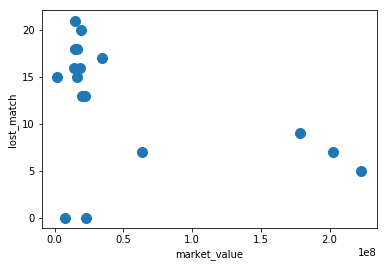

In [11]:
df.plot.scatter(x='market_value', y='lost_match', s=100)

In [12]:
whitened = whiten(df.as_matrix())
whitened

array([[2.10231472, 0.32132016],
       [0.80858258, 3.23641205],
       [2.9108973 , 0.21687297],
       [2.9108973 , 0.2306542 ],
       [1.13201562, 2.93757705],
       [2.10231472, 0.30753893],
       [2.58746427, 0.20091576],
       [1.45544865, 2.58796911],
       [2.42574775, 0.23573149],
       [0.        , 0.33190994],
       [2.58746427, 0.26256862],
       [2.42574775, 0.02466114],
       [2.74918079, 0.5033774 ],
       [1.13201562, 0.92406745],
       [3.23433034, 0.27925115],
       [3.39604685, 0.21687297],
       [0.        , 0.11315112],
       [2.10231472, 0.28287779]])

In [13]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[2.6278934 , 0.25688688],
        [0.37733854, 0.45637617],
        [1.13201562, 2.92065274]]),
 array([0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int32))

In [14]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'g',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'g',
 'r']

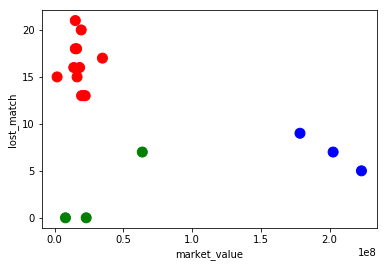

In [15]:
df.plot.scatter(x='market_value', y='lost_match', c=colors, s=100)

In [19]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

/home/andrey/anaconda3/lib/python3.6/site-packages/scipy/cluster/vq.py:523: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 3.04027052,  0.28940574],
        [ 0.        ,  0.22253053],
        [-0.24897408,  1.17209327],
        [ 2.18317298,  0.31996017],
        [ 1.13201562,  2.92065274]]),
 array([3, 4, 0, 0, 4, 3, 3, 4, 3, 1, 3, 3, 0, 3, 0, 0, 1, 3], dtype=int32))

In [20]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'm',
 'r',
 'r',
 'm',
 'y',
 'y',
 'm',
 'y',
 'g',
 'y',
 'y',
 'r',
 'y',
 'r',
 'r',
 'g',
 'y']

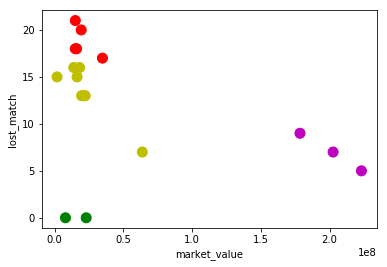

In [21]:
df.plot.scatter(x='market_value', y='lost_match', c=colors, s=100)